In [62]:
import os
import numpy as np
import rasterio
from matplotlib import pyplot

In [4]:
os.getcwd()
os.chdir("Downloads/LC08_L1TP_098067_20170609_20170609_01_RT/")

In [60]:
#List files and open metadata
bands = os.listdir()[2:-2]
print(bands)
with rasterio.open(bands[0]) as src:
    meta = src.meta
    print(meta) #print metadata
 
meta.update(count = len(bands))
    


['LC08_L1TP_098067_20170609_20170609_01_RT_B1.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B10.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B11.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B2.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B3.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B4.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B5.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B6.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B7.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B8.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_B9.TIF', 'LC08_L1TP_098067_20170609_20170609_01_RT_BQA.TIF']
{'count': 1, 'nodata': None, 'crs': CRS({'init': 'epsg:32654'}), 'height': 7791, 'width': 7651, 'dtype': 'uint16', 'driver': 'GTiff', 'transform': (645885.0, 30.0, 0.0, -1003485.0, 0.0, -30.0), 'affine': Affine(30.0, 0.0, 645885.0,
       0.0, -30.0, -1003485.0)}


In [ ]:
#Write to a stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list):
        with rasterio.open(layer) as src1:
            dst.write_band(id + 1, src1.read(1))

_B1 1 0 49589 10577.6500143


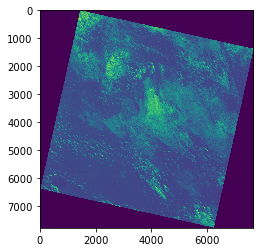

B10 1 0 27507 16614.3485036


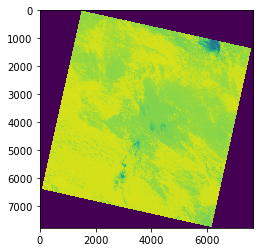

B11 1 0 24144 15161.0058472


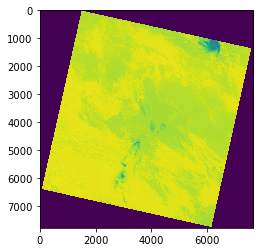

_B2 1 0 52276 10159.4790802


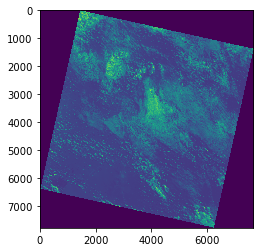

_B3 1 0 52737 9018.76992393


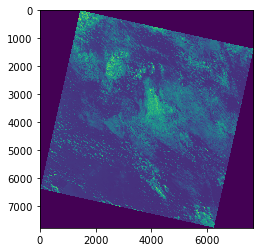

_B4 1 0 55574 8525.69571397


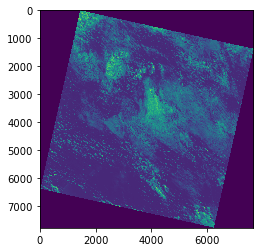

_B5 1 0 59971 8640.32919288


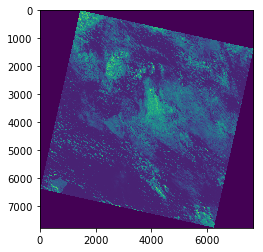

_B6 1 0 41237 7793.45139995


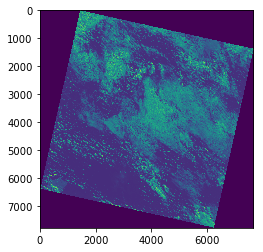

_B7 1 0 30125 6827.99829747


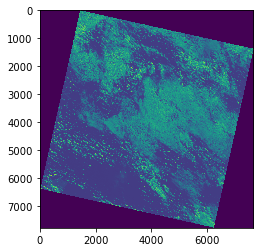

_B8 1 0 54483 8842.52592985


In [ ]:
for b in bands:
    with rasterio.open(b) as src:
        npixels = src.width * src.height
        for i in src.indexes:
            band = src.read(i)
            print(b[-7:-4], i, band.min(), band.max(), band.sum()/npixels)
            pyplot.imshow(band)
            pyplot.show()